<a href="https://colab.research.google.com/github/Hasanduni/OpenCV/blob/main/object_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt



In [52]:
config_file = "/content/ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt"
frozen_model = "/content/frozen_inference_graph.pb"
model = cv2.dnn_DetectionModel(frozen_model, config_file)


In [53]:
classLabels = []
file_name = 'labels.txt'
with open(file_name, 'rt') as fpt:
    classLabels = fpt.read().rstrip('\n').split('\n')

# Optional: print to verify
print(classLabels)


['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [47]:
print(len(classLabels))

80


In [55]:

# Set input parameters for the model
model.setInputSize(320, 320)
model.setInputScale(1.0 / 127.5)
model.setInputMean((127.5, 127.5, 127.5))
model.setInputSwapRB(True)



< cv2.dnn.Model 0x78a9e64d85d0>

In [56]:
# Load the class labels from COCO dataset
with open("coco.names", "r") as f:
    class_labels = f.read().strip().split("\n")


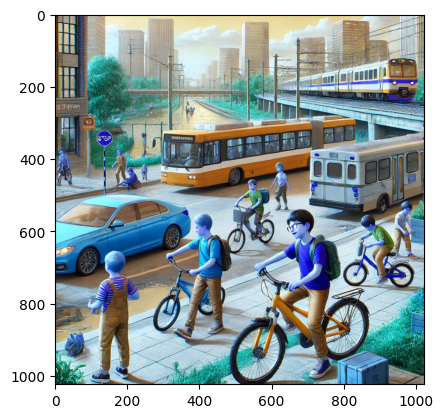

In [74]:

# Read the input image
img = cv2.imread("image.jpg.webp")
plt.imshow(img)



In [75]:

# Perform object detection
class_index, confidence, bbox = model.detect(img, confThreshold=0.5)


In [76]:
print(class_index)


[ 1  1  6  2  1  3  1  6  1  1  2  1  2  2  2  1  1  1  2  2 27 27  6  2
  1  1  1]


In [91]:
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

# Iterate over detections and draw bounding boxes with labels
for class_idx, conf, box in zip(class_index.flatten(), confidence.flatten(), bbox):
    # Draw the rectangle around detected objects
    cv2.rectangle(img, (box[0], box[1]), (box[0] + box[2], box[1] + box[3]), color=(255, 0, 0), thickness=2)

    # Add label text to the image
    cv2.putText(img, classLabels[class_idx - 1], (box[0] + 10, box[1] + 40),
                font, fontScale=font_scale, color=(0, 255, 0), thickness=4)  # Reduced thickness


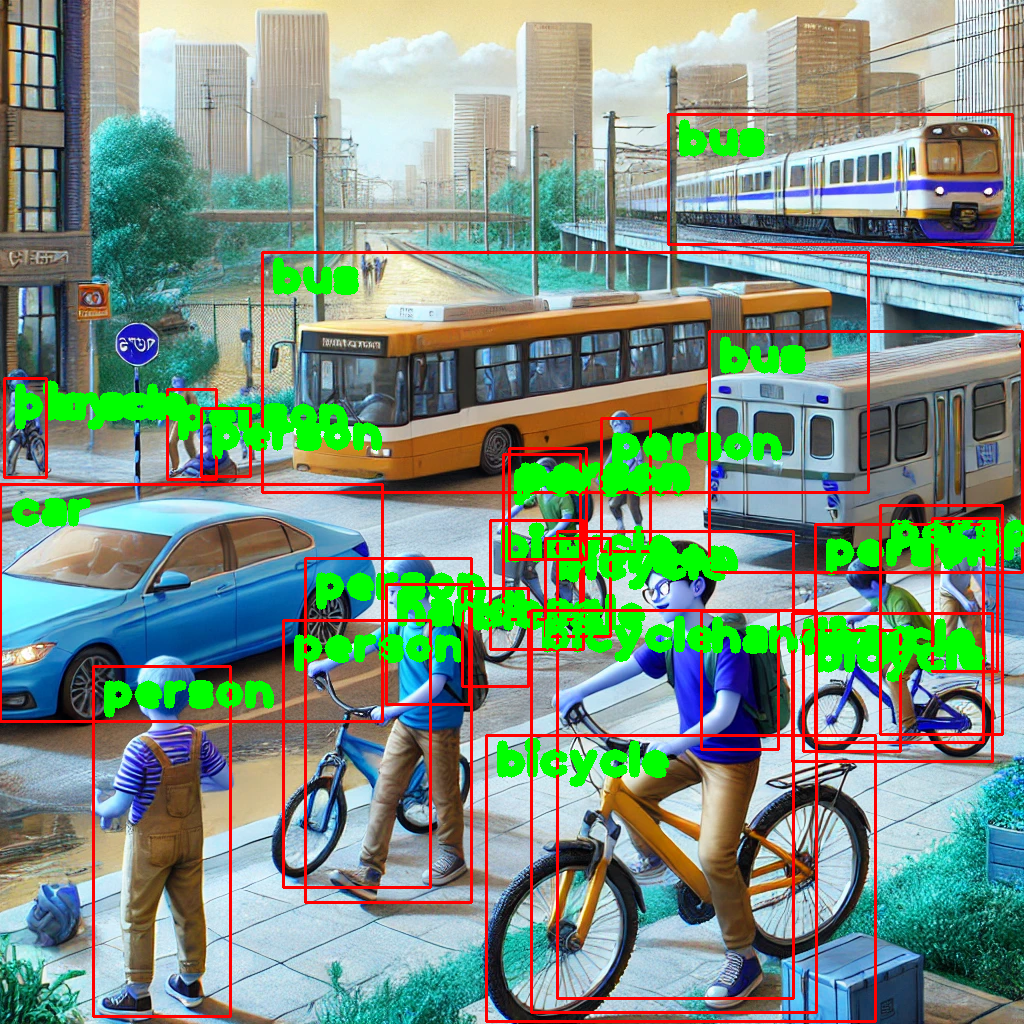

In [92]:
# Display the result using cv2_imshow
cv2_imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

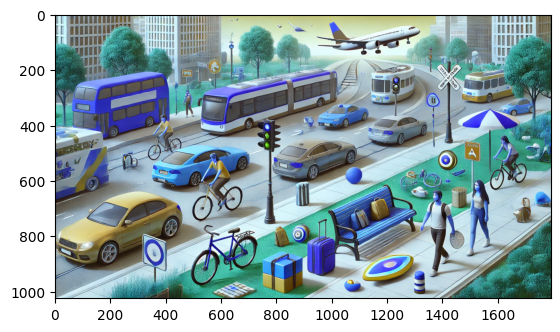

In [96]:

# Read the input image
img2 = cv2.imread("img2.webp")
plt.imshow(img2)



In [99]:

# Perform object detection
class_index, confidence, bbox = model.detect(img, confThreshold=0.5)


In [100]:
print(class_index)


[6 5 3 1 3 6 1 3 1 1 3 1 8 1 1 2]


In [97]:
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

# Iterate over detections and draw bounding boxes with labels
for class_idx, conf, box in zip(class_index.flatten(), confidence.flatten(), bbox):
    # Draw the rectangle around detected objects
    cv2.rectangle(img2, (box[0], box[1]), (box[0] + box[2], box[1] + box[3]), color=(255, 0, 0), thickness=2)

    # Add label text to the image
    cv2.putText(img2, classLabels[class_idx - 1], (box[0] + 10, box[1] + 40),
                font, fontScale=font_scale, color=(0, 255, 0), thickness=4)  # Reduced thickness


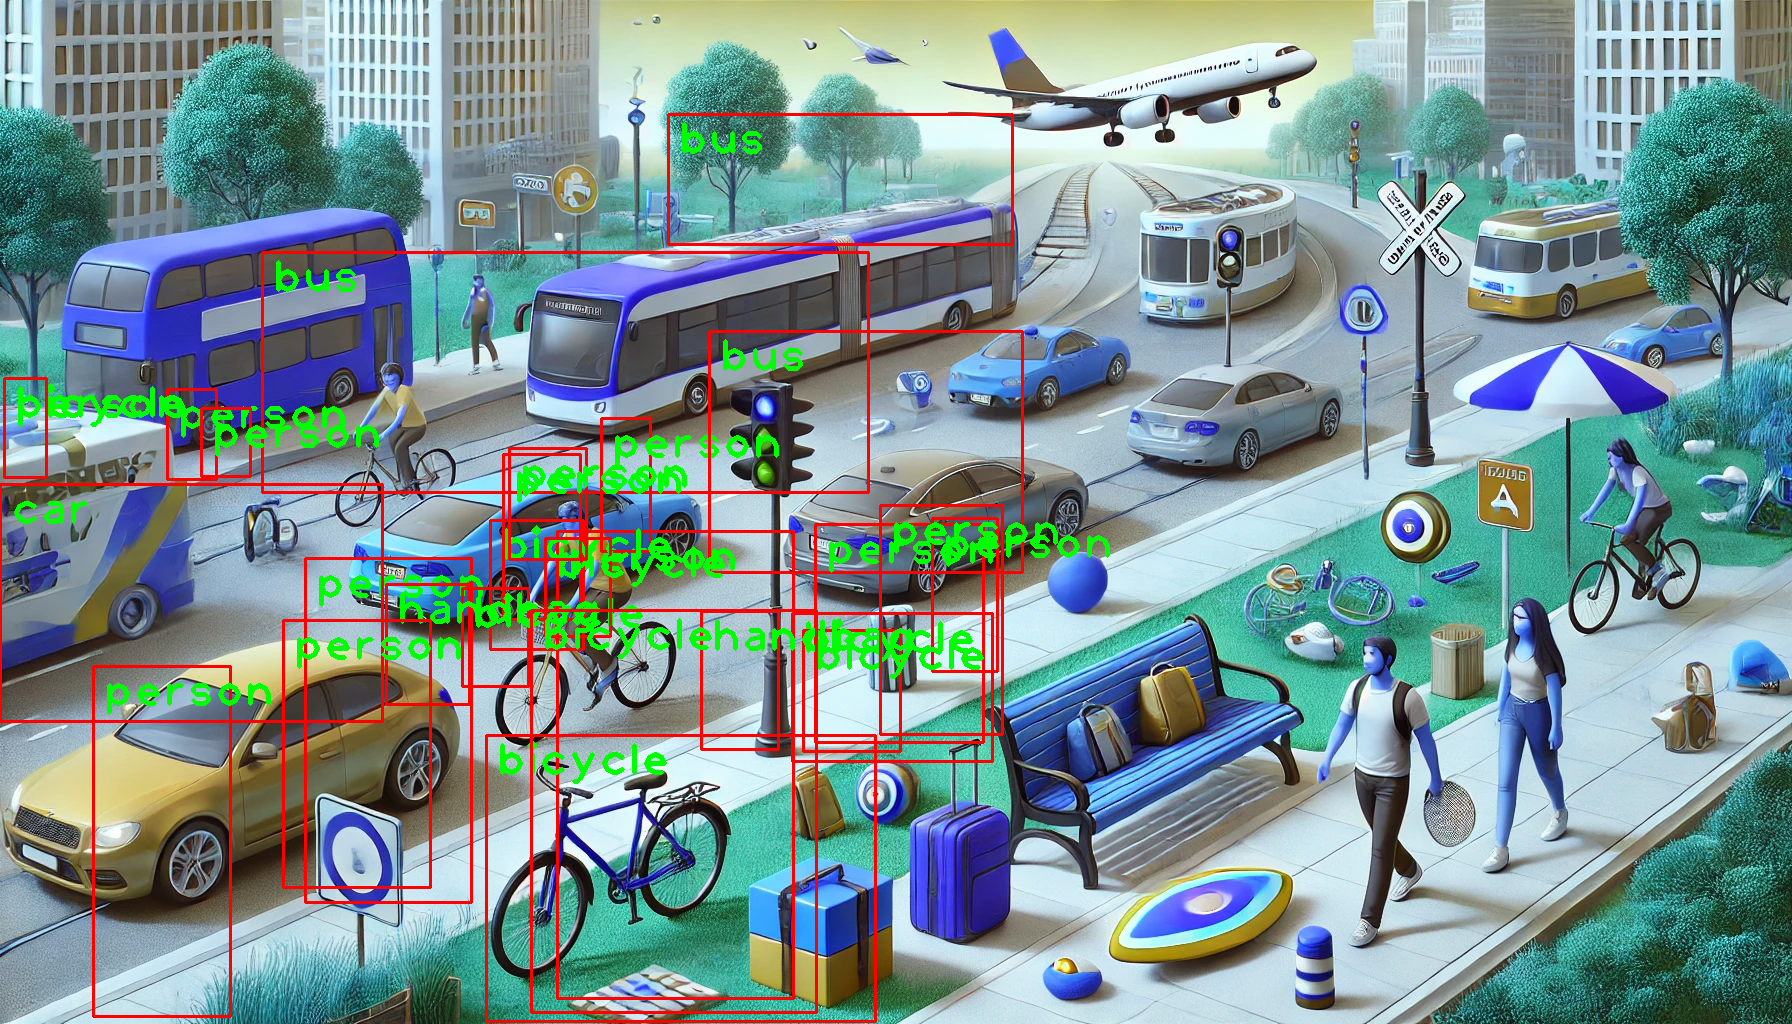

In [98]:
# Display the result using cv2_imshow
cv2_imshow(cv2.cvtColor(img2,cv2.COLOR_BGR2RGB))